<a href="https://colab.research.google.com/github/RoziAb/white_wine_quality/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset obtained from: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


Check data type of attributes.

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Check for missing values.

In [2]:
#As seen below, there are no missing values in any of the columns
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Check the correlation between predictor variables.

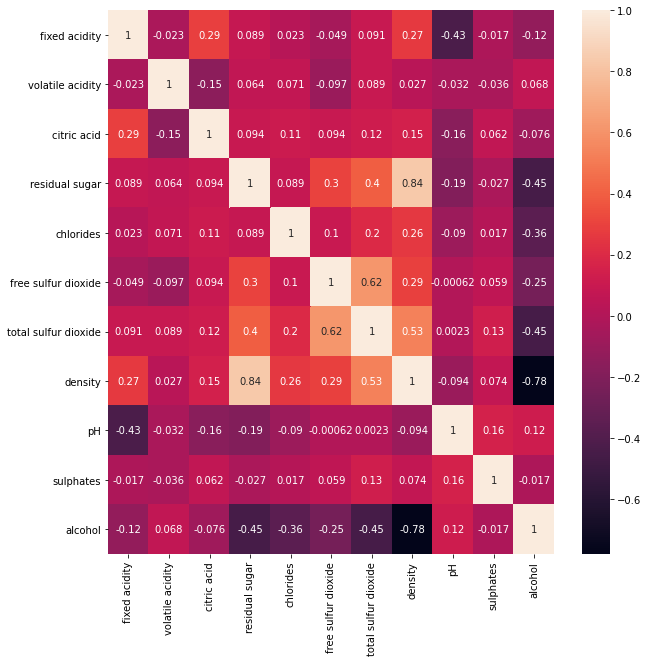

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df_predictor = df.copy()                    #make changes to the copy and not the original df
del df_predictor['quality']
Cors = df_predictor.corr()
#heatmap plot of the correlations:
fig, ax = plt.subplots(figsize=(10,10))     #to make the heatmap plot bigger, so correlation values show up clearly.
sns.heatmap(Cors, annot=True)               #annot=True, to also see the numeric values of correlations

Plot of distribution of the dependent variable (Quality).

Text(0, 0.5, 'Frequency')

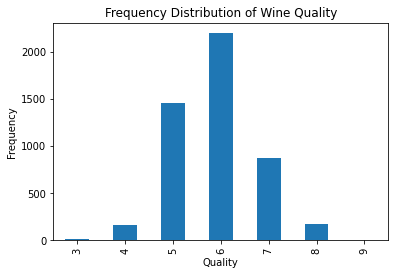

In [4]:
df.groupby('quality').size().plot.bar()
plt.title('Frequency Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')

Reduce the levels of quality to 3 (3-class problem):
- 0 (low quality)
- 1 (medium quality)
- 2 (high quality)

In [5]:
fun = lambda data: 0 if data < 5 else 1 if data < 7 else 2
df['quality'] = df['quality'].apply(fun)
print(df['quality'].value_counts())     # to verify there are only 3 levels now

1    3655
2    1060
0     183
Name: quality, dtype: int64


Normalize numeric attributes.

In [6]:
def normalize(x):
  return ((x - min(x)) / (max(x) - min(x))) 
X = list(set(list(df)) - set(['quality']))      #make a list of columns minus "quality" 
wine_n = df.iloc[:,].copy()                     #make a copy, so you don't change the original df
wine_n[X] = wine_n[X].apply(normalize)          #apply "normalize" to predictor variables
wine_n.describe()                               #All attributes except "quality" are normalized now (min=0, max=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,1.179053
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487,0.470917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935,1.000000
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,1.000000
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Division to training and test sets.

In [7]:
#Using a 70% train, 30% test split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_n[X], wine_n['quality'], test_size=0.30, random_state=123)

Using the KNN algorithm to predict the quality of white wine using predictor variables.

In [8]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)      #number of neighbors used is 5
knn.fit(X_train, y_train)                      #building the model using the training data
#Pedictions:
y_pred = knn.predict(X_test)  
y_pred[:100]                                    #showing the fist 100 predicted classes for the test set        

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1])

Confusion matrix.

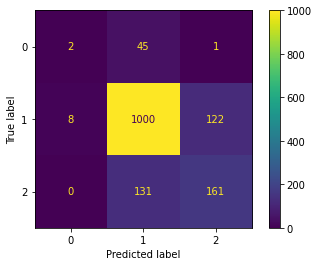

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, labels=[0, 1, 2], values_format = '') 

Model performance: Reporting Accuracy, Sensitivity, and Specificity.

In [10]:
 from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
True0 = CM[0][0]      # Actual class is 0 and predicted as 0.
True1 = CM[1][1]
True2 = CM[2][2]
Error01 = CM[0][1]    # Actual class is 0 and predicted as 1.
Error02 = CM[0][2]
Error10 = CM[1][0]
Error12 = CM[1][2]
Error20 = CM[2][0]
Error21 = CM[2][1]
Accuracy = (True0 + True1 + True2)/(True0 + True1 + True2 + Error01 + Error02 + Error10 + Error12 + Error20 +Error21)
##Sensitivity and Specificity for quality level 0 (low quality):
Sensitivity0 = True0/(True0 + Error01 + Error02)
Specificity0 = (True1 + Error12 + Error21 + True2)/(True1 + Error12 + Error21 + True2 + Error10 + Error20)
##Sensitivity and Specificity for quality level 1 (medium quality):
Sensitivity1 = True1/(True1 + Error10 + Error12)
Specificity1 = (True0 + Error02 + Error20 + True2)/(True0 + Error02 + Error20 + True2 + Error01 + Error21)
##Sensitivity and Specificity for quality level 2 (high quality):
Sensitivity2 = True2/(True2 + Error20 + Error21)
Specificity2 = (True0 + Error01 + Error10 + True1)/(True0 + Error01 + Error10 + True1 + Error12 + Error02)
print("Accuracy: ", round(Accuracy, 4)) 
print("")
print("Sensitivity for level 0: ", round(Sensitivity0, 4))
print("Specificity for level 0: ", round(Specificity0, 4)) 
print("")
print("Sensitivity for level 1: ", round(Sensitivity1, 4))
print("Specificity for level 1: ", round(Specificity1, 4)) 
print("")
print("Sensitivity for level 2: ", round(Sensitivity2, 4))
print("Specificity for level 2: ", round(Specificity2, 4)) 

Accuracy:  0.7912

Sensitivity for level 0:  0.0417
Specificity for level 0:  0.9944

Sensitivity for level 1:  0.885
Specificity for level 1:  0.4824

Sensitivity for level 2:  0.5514
Specificity for level 2:  0.8956


In [11]:
# Alternative way to obtain accuracy using sklearn's accuracy_score function.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.791156462585034


In [12]:
# Aternative way to obtain sensitivities (recalls) using sklearn's classification_report() function.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.04      0.07        48
           1       0.85      0.88      0.87      1130
           2       0.57      0.55      0.56       292

    accuracy                           0.79      1470
   macro avg       0.54      0.49      0.50      1470
weighted avg       0.77      0.79      0.78      1470

